# Assembling the imperfect waterbomb elements

Show the structure of implementation with distributed responsibilities:

**WBCell:** individual cell related operations.

**WBAssembly:** responsible for assembling the cells. It can use classes like CellCombinator and CellEvaluator to get the job done.

**WBCombinator:** take care of generating all possible permutations of cells.

In [1]:
import k3d
import numpy as np
import matplotlib.pylab as plt
from bmcs_shell.folding.assembly.wb_assembler import WBAssembler

/Users/gui/Documents/VSCode/bmcs_shell/bmcs_shell/folding/assembly/wb_assembler.py:291: SyntaxWarning: invalid escape sequence '\c'
  ax.text(x_middle+W/8, y_middle+30, f"{angle_right:.1f}$^\circ$", va='bottom', ha='left')
/Users/gui/Documents/VSCode/bmcs_shell/bmcs_shell/folding/assembly/wb_assembler.py:292: SyntaxWarning: invalid escape sequence '\c'
  ax.text(x_middle-W/8, y_middle+30, f"{angle_left:.1f}$^\circ$", va='bottom', ha='right')


# Modules 3

### Read the scanned files for individual cells

Demonstrator series

In [2]:
modules = {'WB305': ('WB305_facets_points.obj', [[1, 0], [np.pi/2, np.pi/2]]),
           'WB306': ('WB306_facets_points.obj', [[1, 0], [np.pi/2, -np.pi/2]]),
           'WB307': ('WB307_facets_points.obj', [[1], [np.pi/2]]),
           'WB308': ('WB308_facets_points.obj', [[1, 2], [np.pi/2, np.pi]]),
           'WB309': ('WB309_facets_points.obj', [[0, 2], [np.pi/2, -np.pi/2]]),
           'WB310': ('WB310_facets_points.obj', [[1, 2], [np.pi/2, np.pi]]),
           'WB311': ('WB311_facets_points.obj', [[1], [np.pi/2]]),
           'WB312': ('WB312_facets_points.obj', [[1], [-np.pi/2]]),
           'WB313': ('WB307_facets_points.obj', [[1], [np.pi/2]]),
           'WB314': ('WB310_facets_points.obj', [[1, 2], [np.pi/2, np.pi]]),
           'WB315': ('WB311_facets_points.obj', [[1], [np.pi/2]]),
           'WB316': ('WB311_facets_points.obj', [[1], [np.pi/2]]),
           }

assembly = WBAssembler(modules=modules)

### Check the orientation of the individual cells

To ensure a link to the real cells check to see that the cell is defined
in the $x-y$ plane and its marker is on the bottom right corner.

In [3]:
wb = assembly.wbs[4]
plot = k3d.plot(name='Vectors')
wb.plot_groups_of_points(plot, wb.wb_scan_X_Fia)
wb.plot_points(plot, wb.centroids_Fa, point_size=20, 
                      color=0x000000, plot_numbers=True)
plot.display()

/Users/gui/Documents/VSCode/bmcs_env/lib/python3.12/site-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "float64" does not match required type "float32". A coerced copy has been created.
  warnings.warn(


Output()

### Show geometrical deviations

Plot all cells in a local coordinate system located in the center of the cell one over the other to see the amount of the deviations between individual cells.

In [4]:

plot = k3d.plot(name='Vectors')
#wb.plot_points(plot, wb.O_centroids_Fa, plot_numbers=True)
assembly.plot_modules_3D(plot, facet_numbers=False, module_numbers=False)
plot.display()

Output()

### Apply the assembly scenario

The position of the cells is defined by running the assembly sequence. Due to imperfections, each plug step means a deviation from the ideal geometry. To avoid cumulation of imprecisions, the order and orientation of cells will be varied with the goal to compensate for the imprecision within such that the misfit between cells is minimized.

In [5]:
plot = k3d.plot(name='Vectors')
assembly.plug_modules()
assembly.plot_modules_3D(plot)
plot.display()

Output()

### Verify the contact conditions

Show the contact points of two cells in local coordinate system. Calculation of rotation
and translation in horizontal and vertical directions requires that the marked points are 
lie on the plane of the facet that is indicated by the indicated normal vector.

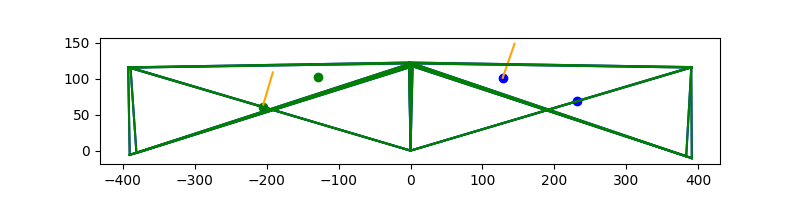

In [6]:
%matplotlib widget
wb_C = assembly.wbs[8]
wb_D = assembly.wbs[8]
fig, ax = plt.subplots(1,1, figsize=(8,2))
wb_C.plot_plugged_neighbors_yz(wb_D, diag_dir=1, y_dir=1, ax=ax)

### Plot the longitudinal view of the assembly

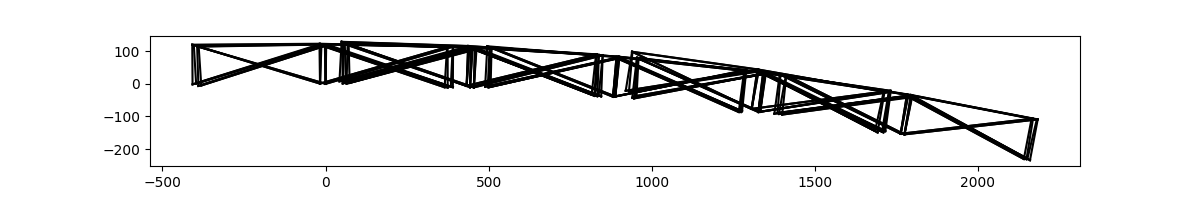

In [7]:
fig, ax = plt.subplots(1,1,figsize=(12,2))
assembly.plot_modules_yz(ax)

###  Plot transverse view of the assembly

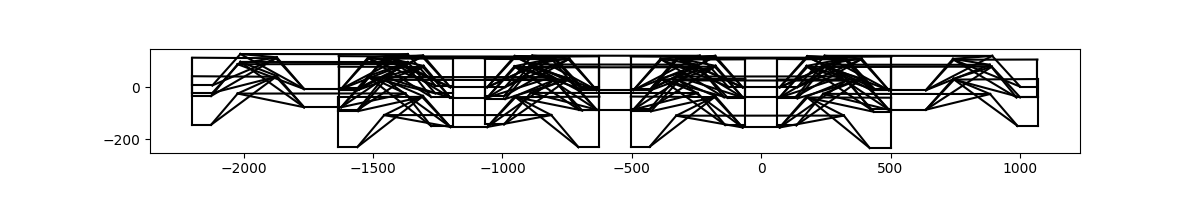

In [8]:
fig, ax = plt.subplots(1,1,figsize=(12,2))
assembly.plot_modules_xz(ax)

### Quantification of misfit

In inter-module contacts which were not included in the plugin scenario, quantify the gaps or penetrations as a basis for minimization of the misfit. 

In [9]:
assembly.get_module_misfits()

array([[ -1.76609903,  -1.57082161],
       [  8.57700392,  -2.41104935],
       [ -0.46051718,  -3.22367126],
       [  9.54925845,   2.26492229],
       [ 10.14773943, -16.74594895]])

## Identify the best assembly

### All possible cell arrangements

Combine 8 entities of type A and four entities of type B in all possible ordered sequences of 12 entities. While the type A entities go to the first 8 slots, the type B entities go to the last 4 slots. The entities are identified by integers starting from 1 ... 8 for type A and 9 ... 12 for type B. Further, the type A entities are assumed to have either positive or negative sign. However, their combinations are not assumed arbitrary. The signs in the slots [0, 1, 3, 4, 6, 7] are assumed always opposite to the slots [2, 5]. 

In [10]:
assembly.all_perms

array([[ 1,  2, -3, ..., 10, 11, 12],
       [ 1,  2, -3, ..., 10, 12, 11],
       [ 1,  2, -3, ..., 11, 10, 12],
       ...,
       [-8, -7,  6, ..., 10, 11,  9],
       [-8, -7,  6, ..., 11,  9, 10],
       [-8, -7,  6, ..., 11, 10,  9]])

### Evaluate misfit for random combinations

If only whole cells are subject to the permutation, alternating orientation is prescribed, and the boundary cells are not permuted, the total number combinations is 1.9 millions.

To reduce the computation time for debugging, the random choice from all combinations is used to find assembly arrangement with low amount of misfit.

In [11]:
assembly.n_samples = 100

### Choose the best assembly and plot it

In [12]:
assembly.best_combination_index

1

### Show the misfit of the best combination obtained

In [13]:
assembly.misfit_of_best_combination

array([[ 3.31986821, -7.03836084],
       [-3.96075932,  1.38048115],
       [-2.08210157,  0.85934727],
       [ 6.81029682, -1.09484416],
       [-4.51847839, -4.73259012]])

In [14]:
plot = k3d.plot(name='Vectors')
assembly.plot_best_combination_3D(plot)
plot.display()

Output()

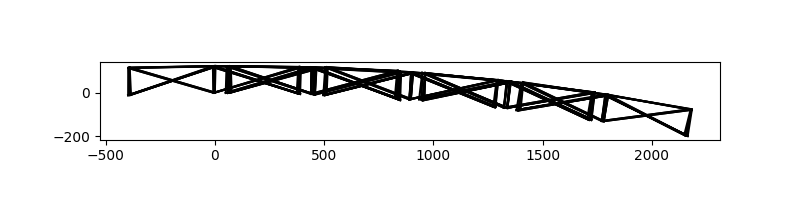

In [15]:
fig, ax = plt.subplots(figsize=(8,2))
fig.canvas.header_visible=False
assembly.plot_best_combination_yz(ax)

## Extract the plugin support heights

In [16]:
assembly.activate_best_combination
assembly.cell_enum[assembly.module_x_rows[0]]
assembly.module_x_rows


[[0, 1], [2, 8, 10], [3, 4], [5, 9, 11], [6, 7]]

In [17]:
assembly.get_support_geometry()

(array([[-2.65057710e+00, -5.03472097e-01],
        [ 4.49353481e+02, -7.49840518e+00],
        [ 8.93372704e+02, -3.04122653e+01],
        [ 1.33287476e+03, -6.99791798e+01],
        [ 1.77490109e+03, -1.30396682e+02]]),
 array([-0.0029253 ,  0.03178072,  0.07568396,  0.11359204,  0.15674053]))

Plot a vertical column of a width W and height H which denotes the distance from the floor at the level zero to a saddle point in the located at the height H in the middle of the column. There are two lines starting from the saddle towards the vertical boundaries of the column symmetrically at an angle $\gamma < \pi/2$. The intersections of these two lines with the vertical boundaries of the columns are higher than the saddle point. The column is filled with color `c`. The upper boundary of the column has a V-shape. An additional feature of the function is the possibility to tilt the V-shape by an angle $\alpha < \pi / 4$.    
 

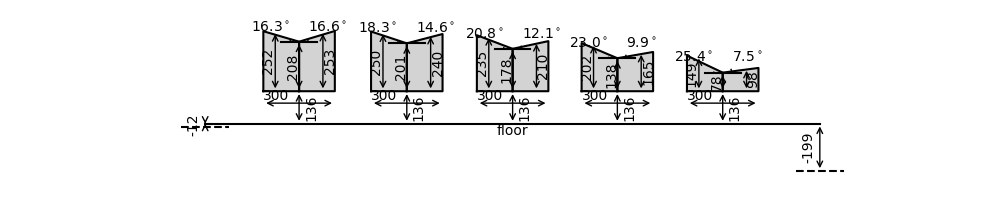

In [18]:
fig, ax = plt.subplots(figsize=(10,2))
fig.canvas.header_visible=False
assembly.plot_longitudinal_supports(ax)

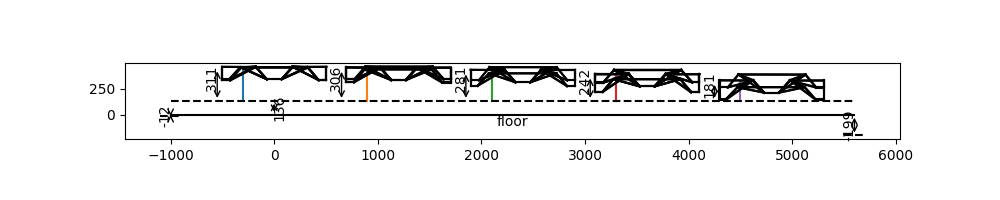

In [19]:
fig, ax = plt.subplots(figsize=(10,2))
fig.canvas.header_visible=False
assembly.plot_transverse_supports(ax)
ax.set_axis_on()

### Get the average angle of the middle opposite facets [3, 10] 

In [20]:
assembly.gamma_support

2.5672755211565375

In [21]:
assembly.get_bounding_box()

(array([-2198.85100257,  -396.67337773,  -198.76973598]),
 array([1068.95850167, 2182.37183036,  121.57434845]))